In [10]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# For visualization (optional)
sns.set(style="whitegrid")


In [12]:
# Step 2: Create a synthetic dataset
# Suppose we have data for total purchases in different categories for each customer
data = {
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'purchase_electronics': [200, 400, 300, 500, 100, 700, 300, 800, 400, 600],
    'purchase_clothing': [100, 200, 150, 300, 80, 400, 150, 500, 250, 350],
    'purchase_groceries': [500, 600, 550, 700, 450, 800, 550, 900, 600, 750],
    'purchase_furniture': [300, 400, 350, 500, 250, 600, 350, 700, 400, 500]
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())


   customer_id  purchase_electronics  purchase_clothing  purchase_groceries  \
0            1                   200                100                 500   
1            2                   400                200                 600   
2            3                   300                150                 550   
3            4                   500                300                 700   
4            5                   100                 80                 450   

   purchase_furniture  
0                 300  
1                 400  
2                 350  
3                 500  
4                 250  


In [14]:
# Step 3: Preprocess the data (scaling features)
# Features: We don't use 'customer_id' for clustering
features = ['purchase_electronics', 'purchase_clothing', 'purchase_groceries', 'purchase_furniture']

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Print scaled data (optional)
print("Scaled data:\n", df_scaled[:5])


Scaled data:
 [[-1.0952381  -1.13059481 -1.03209369 -1.01977593]
 [-0.14285714 -0.3666794  -0.29488391 -0.26438635]
 [-0.61904762 -0.74863711 -0.6634888  -0.64208114]
 [ 0.33333333  0.39723602  0.44232587  0.49100322]
 [-1.57142857 -1.2833779  -1.40069858 -1.39747071]]


C:\Users\blneh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\blneh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\blneh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\blneh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

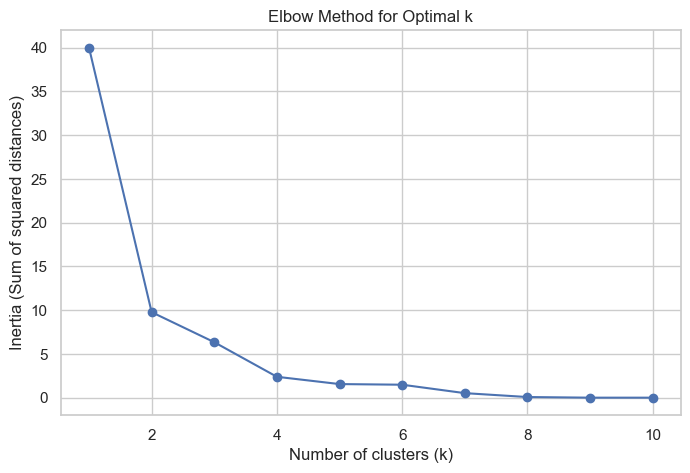

In [16]:
# Step 4: Determine the optimal number of clusters using the Elbow Method (Optional)
inertia = []  # Sum of squared distances of samples to their closest cluster center
K = range(1, 11)  # Check from 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [18]:
# Step 5: Implement the K-Means algorithm with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the K-Means model to the scaled data
kmeans.fit(df_scaled)

# Get the cluster labels
df['cluster'] = kmeans.labels_

# Display the dataset with the assigned clusters
print(df)


   customer_id  purchase_electronics  purchase_clothing  purchase_groceries  \
0            1                   200                100                 500   
1            2                   400                200                 600   
2            3                   300                150                 550   
3            4                   500                300                 700   
4            5                   100                 80                 450   
5            6                   700                400                 800   
6            7                   300                150                 550   
7            8                   800                500                 900   
8            9                   400                250                 600   
9           10                   600                350                 750   

   purchase_furniture  cluster  
0                 300        2  
1                 400        1  
2                 350        1 

C:\Users\blneh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


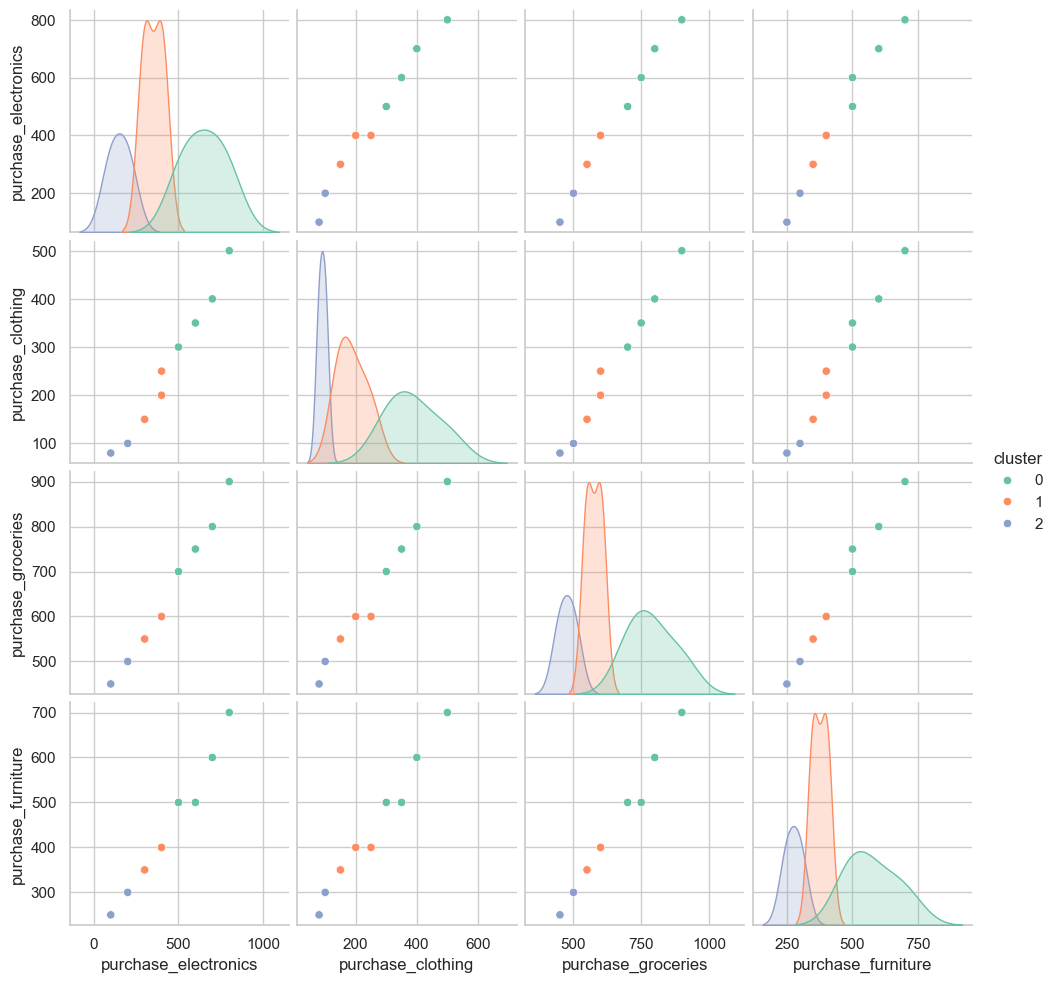

In [20]:
# Step 6: Visualize the clusters using pairplot (for a simple visualization)
# Note: This is more suitable when there are fewer features. You can use t-SNE or PCA for higher-dimensional data.
sns.pairplot(df, hue='cluster', vars=features, palette="Set2")
plt.show()


In [22]:
# Step 7: Evaluate the results
# Print the cluster centers (centroids in the original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)
print("Cluster centers:\n", centroid_df)

# Inertia (sum of squared distances to nearest cluster center)
print("Final inertia:", kmeans.inertia_)


Cluster centers:
    purchase_electronics  purchase_clothing  purchase_groceries  \
0                 650.0              387.5               787.5   
1                 350.0              187.5               575.0   
2                 150.0               90.0               475.0   

   purchase_furniture  
0               575.0  
1               375.0  
2               275.0  
Final inertia: 6.339178620702969
